In [2]:
import pickle
import numpy as np
import pandas as pd
import pickle
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegressionCV
from msresist.figures.figureM2 import TumorType
from msresist.logistic_regression import plotClusterCoefficients, plotPredictionProbabilities, plotConfusionMatrix, plotROC
from msresist.figures.figure3 import plotPCA, plotMotifs
from msresist.clustering import MassSpecClustering
from msresist.pre_processing import filter_NaNpeptides, MeanCenter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

Matplotlib is building the font cache; this may take a moment.


## BINOMIAL 15 CLUSTERS

In [3]:
with open('msresist/data/pickled_models/CPTACmodel_BINOMIAL_CL15_W10_F0.1', 'rb') as p:
    model = pickle.load(p)[0]

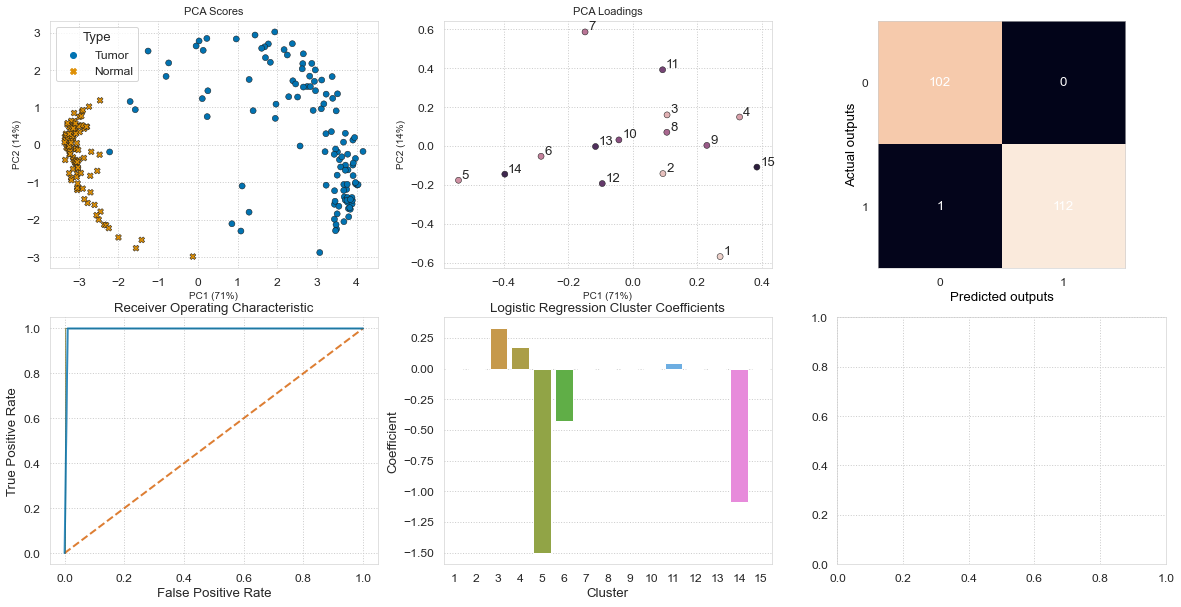

In [5]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

centers = pd.DataFrame(model.transform())
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)
centers.columns = list(np.arange(model.ncl) + 1) + ["Patient_ID"]


fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# PCA analysis
centers = TumorType(centers)
plotPCA(ax[0, :2], centers, 2, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

# Regression
c = centers.select_dtypes(include=['float64'])
tt = centers.iloc[:, -1]
tt = tt.replace("Normal", 0)
tt = tt.replace("Tumor", 1)
lr = LogisticRegressionCV(cv=model.ncl, solver="saga", max_iter=10000, n_jobs=-1, penalty="elasticnet", class_weight="balanced", l1_ratios=[0.5, 0.9]).fit(c, tt)

# plotPredictionProbabilities(ax[3], lr, c, tt)
plotConfusionMatrix(ax[0, 2], lr, c, tt)
plotROC(ax[1, 0], lr, c.values, tt, cv_folds=4)
plotClusterCoefficients(ax[1, 1], lr)

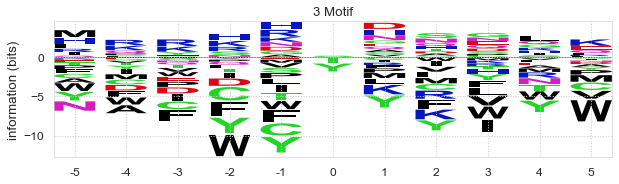

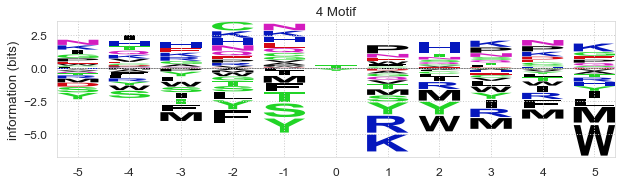

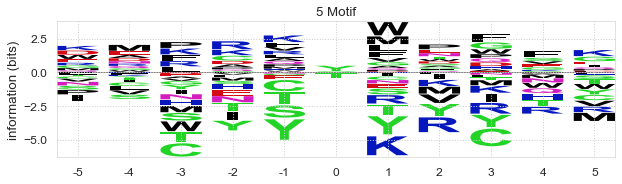

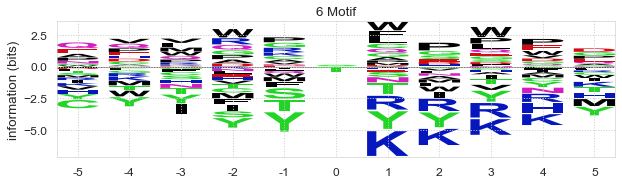

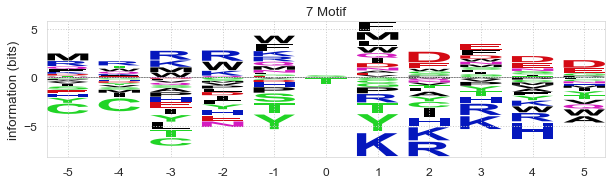

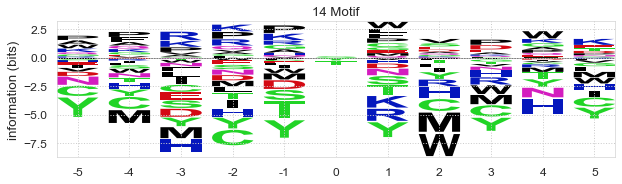

In [6]:
pssms = model.pssms(PsP_background=True)
motifs = [pssms[2], pssms[3], pssms[4], pssms[5], pssms[6], pssms[13]]
plotMotifs(motifs, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], titles=["3", "4", "5", "6", "7", "14"])

In [13]:
ukin_mc.head()

Kinase         1         2         3         4         5         6  \
0   PLM2  0.472184  0.705508  1.630980 -6.479788 -1.521604  0.492098   
1   NEK2 -0.460290 -0.476949 -0.317654  1.267332  0.662144 -0.251845   
2    LCK -0.442314  0.084351 -0.279469  1.600359 -1.140582  0.528102   
3   ERK2 -0.888940  2.788473  1.503611  0.699873 -0.123851  2.009901   
4    BLK -0.299135 -0.030046  0.019356  1.693073 -0.195855  0.228821   

          7         8         9        10        11        12        13  \
0 -3.835365  1.098544 -0.533891  0.854649  0.288374  0.858235  0.765990   
1  0.978880  0.181735  0.096106 -0.023519 -0.368377  0.496135  0.326708   
2  0.903417  1.265832  1.613721 -0.984274 -0.941510 -0.358906  0.581780   
3 -2.354392  3.195611 -4.914359  0.321559  1.400785  0.382950 -5.939451   
4  0.803188  0.879517  0.000937 -0.060775 -0.418109 -0.464921  0.002559   

         14        15        16        17        18        19        20  \
0 -1.464968 -0.212409  0.948245  0.990694  1.373878  0.845446  2.014133   
1 -0.278830  0.475858 -0.544919  0.600646 -0.673846 -0.827999 -0.006932   
2  0.970913 -0.254329  0.047423 -0.813835 -0.482687 -0.133596 -1.716803   
3  2.006397 -0.073589  2.520010  1.739481 -0.982757  2.367609  0.146659   
4  0.687516 -0.406033  0.032015 -0.648742 -0.600346 -0.296685 -0.798218   

         21        22        23        24  
0  0.298652 -0.386307  0.966898 -0.170177  
1 -0.239792 -0.209353 -0.417870  0.012633  
2  0.938395 -0.707072 -0.423289  0.144374  
3 -3.930347  0.477321 -1.495006 -0.857548  
4  0.034631  0.346351 -0.314674 -0.194427

<AxesSubplot:ylabel='Kinase'>

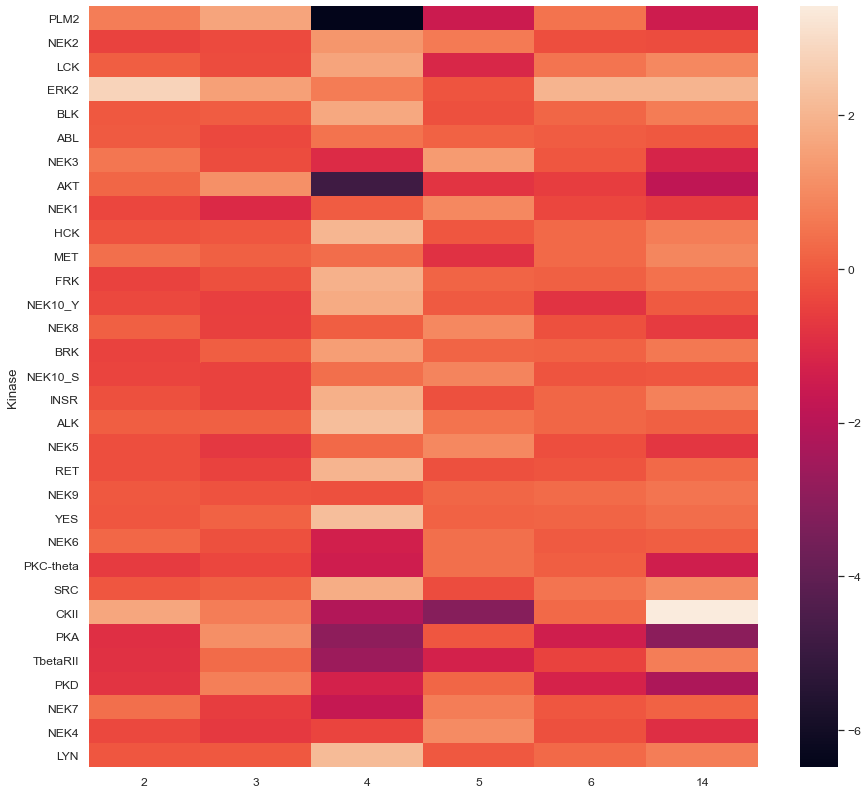

In [14]:
ukin = model.predict_UpstreamKinases()
ukin_mc = MeanCenter(ukin, mc_col=True, mc_row=True)

_, ax = plt.subplots(1, 1, figsize=(15, 14))
ukin_mc.columns = ["Kinase"] + list(np.arange(1, model.ncl+1))
sns.heatmap(ukin_mc.set_index("Kinase")[[2,3,4,5,6,14]])

## BINOMIAL 24 CLUSTERS
### MIX WEIGHT

In [8]:
with open('msresist/data/pickled_models/CPTACmodel_BINOMIAL_CL24_W15_TMT2', 'rb') as p:
    model = pickle.load(p)[0]

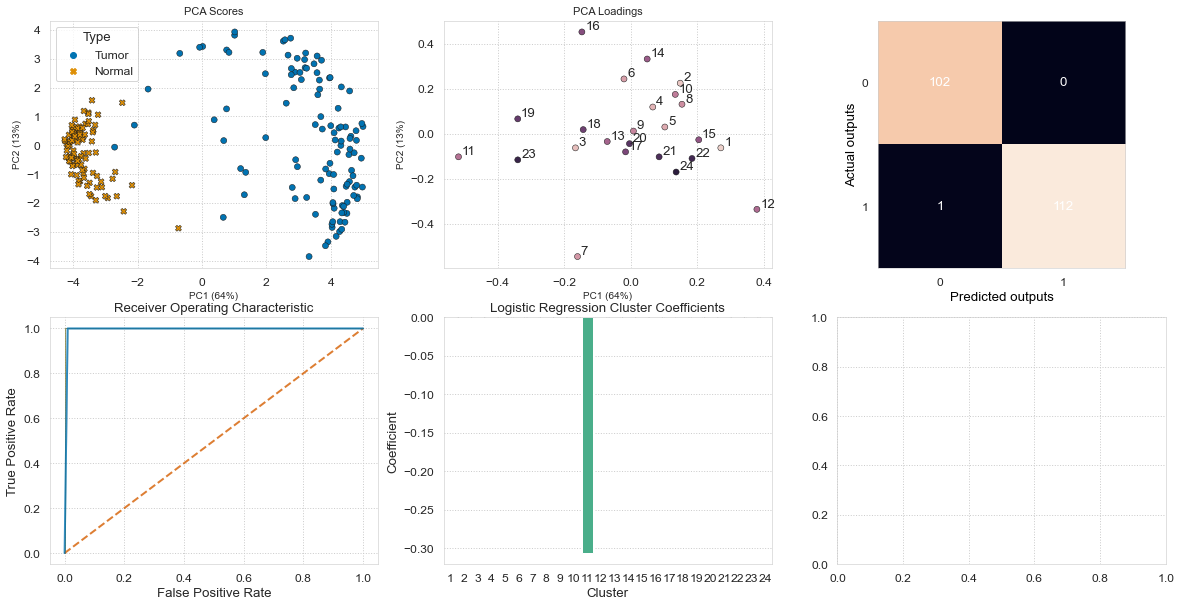

In [20]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

centers = pd.DataFrame(model.transform())
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)
centers.columns = list(np.arange(model.ncl) + 1) + ["Patient_ID"]


fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# PCA analysis
centers = TumorType(centers)
plotPCA(ax[0, :2], centers, 2, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

# Regression
c = centers.select_dtypes(include=['float64'])
tt = centers.iloc[:, -1]
tt = tt.replace("Normal", 0)
tt = tt.replace("Tumor", 1)
lr = LogisticRegressionCV(cv=model.ncl, solver="saga", max_iter=10000, n_jobs=-1, penalty="elasticnet", class_weight="balanced", l1_ratios=[0.5, 0.9]).fit(c, tt)

# plotPredictionProbabilities(ax[3], lr, c, tt)
plotConfusionMatrix(ax[0, 2], lr, c, tt)
plotROC(ax[1, 0], lr, c.values, tt, cv_folds=4)
plotClusterCoefficients(ax[1, 1], lr)

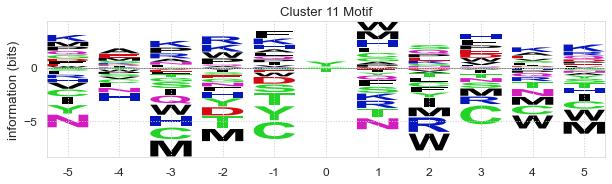

In [12]:
pssms = model.pssms(PsP_background=True)
motifs = [pssms[10]]
plotMotifs(motifs, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], titles=["Cluster 11"])

<AxesSubplot:ylabel='Kinase'>

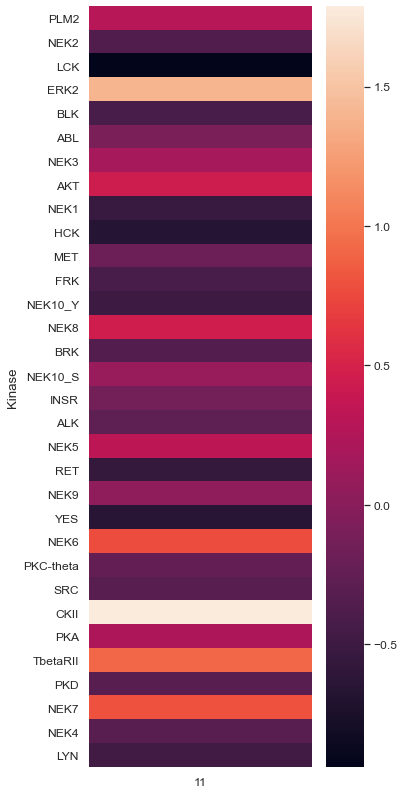

In [17]:
ukin = model.predict_UpstreamKinases()
ukin_mc = MeanCenter(ukin, mc_col=True, mc_row=True)

_, ax = plt.subplots(1, 1, figsize=(5, 14))
ukin_mc.columns = ["Kinase"] + list(np.arange(1, model.ncl+1))
sns.heatmap(ukin_mc.set_index("Kinase")[[11]])

### DATA ONLY

In [4]:
with open('msresist/data/pickled_models/CPTACmodel_BINOMIAL_CL24_W0_TMT2', 'rb') as p:
    model = pickle.load(p)[0]

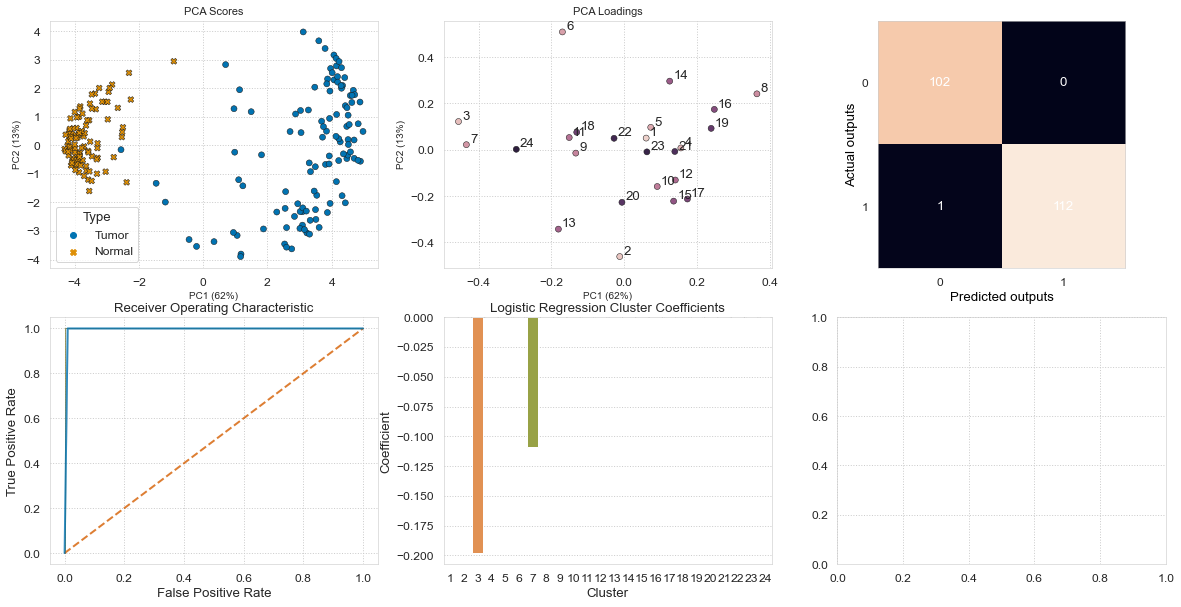

In [5]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

centers = pd.DataFrame(model.transform())
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)
centers.columns = list(np.arange(model.ncl) + 1) + ["Patient_ID"]


fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# PCA analysis
centers = TumorType(centers)
plotPCA(ax[0, :2], centers, 2, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

# Regression
c = centers.select_dtypes(include=['float64'])
tt = centers.iloc[:, -1]
tt = tt.replace("Normal", 0)
tt = tt.replace("Tumor", 1)
lr = LogisticRegressionCV(cv=model.ncl, solver="saga", max_iter=10000, n_jobs=-1, penalty="elasticnet", class_weight="balanced", l1_ratios=[0.5, 0.9]).fit(c, tt)

# plotPredictionProbabilities(ax[3], lr, c, tt)
plotConfusionMatrix(ax[0, 2], lr, c, tt)
plotROC(ax[1, 0], lr, c.values, tt, cv_folds=4)
plotClusterCoefficients(ax[1, 1], lr)

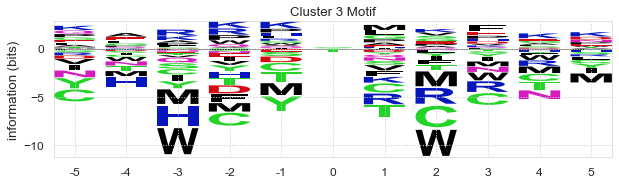

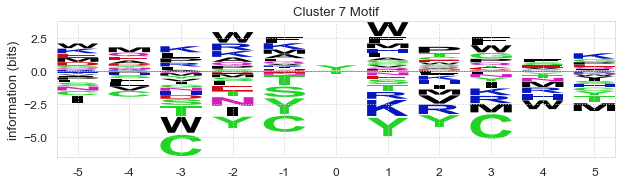

In [6]:
pssms = model.pssms(PsP_background=True)
motifs = [pssms[2], pssms[6]]
plotMotifs(motifs, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], titles=["Cluster 3", "Cluster 7"])

<AxesSubplot:ylabel='Kinase'>

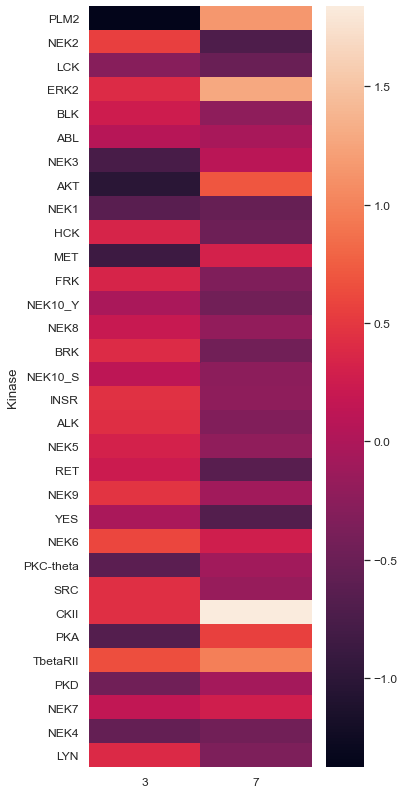

In [7]:
ukin = model.predict_UpstreamKinases()
ukin_mc = MeanCenter(ukin, mc_col=True, mc_row=True)

_, ax = plt.subplots(1, 1, figsize=(5, 14))
ukin_mc.columns = ["Kinase"] + list(np.arange(1, model.ncl+1))
sns.heatmap(ukin_mc.set_index("Kinase")[[3,7]])

### SEQUENCE ONLY

In [12]:
with open('msresist/data/pickled_models/CPTACmodel_BINOMIAL_CL24_W50_TMT2', 'rb') as p:
    model = pickle.load(p)[0]

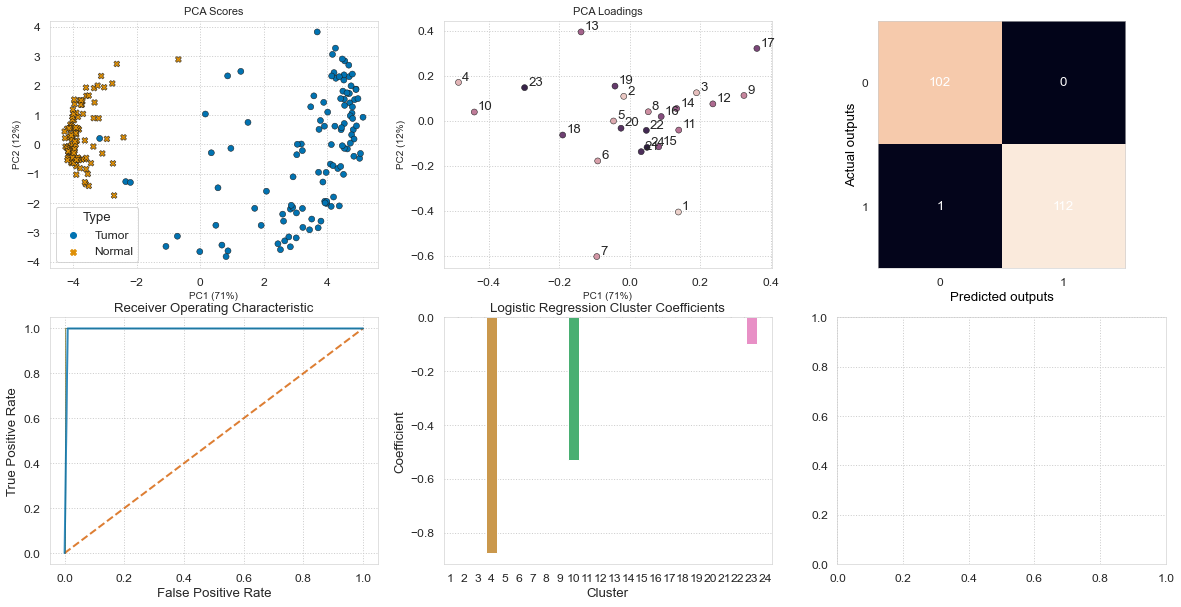

In [13]:
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

centers = pd.DataFrame(model.transform())
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)
centers.columns = list(np.arange(model.ncl) + 1) + ["Patient_ID"]


fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# PCA analysis
centers = TumorType(centers)
plotPCA(ax[0, :2], centers, 2, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

# Regression
c = centers.select_dtypes(include=['float64'])
tt = centers.iloc[:, -1]
tt = tt.replace("Normal", 0)
tt = tt.replace("Tumor", 1)
lr = LogisticRegressionCV(cv=model.ncl, solver="saga", max_iter=10000, n_jobs=-1, penalty="elasticnet", class_weight="balanced", l1_ratios=[0.5, 0.9]).fit(c, tt)

# plotPredictionProbabilities(ax[3], lr, c, tt)
plotConfusionMatrix(ax[0, 2], lr, c, tt)
plotROC(ax[1, 0], lr, c.values, tt, cv_folds=4)
plotClusterCoefficients(ax[1, 1], lr)

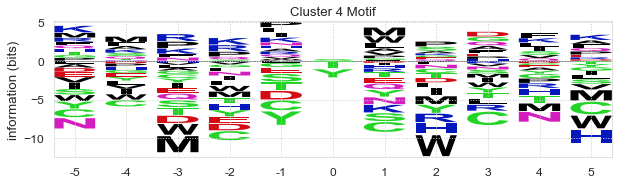

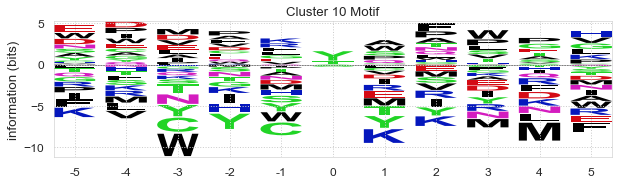

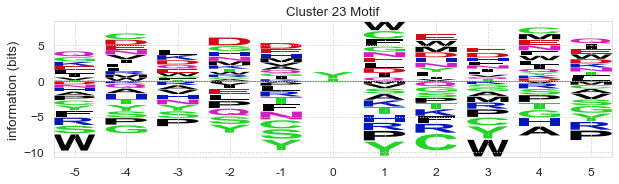

In [14]:
pssms = model.pssms(PsP_background=True)
motifs = [pssms[3], pssms[9], pssms[22]]
plotMotifs(motifs, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], titles=["Cluster 4", "Cluster 10", "Cluster 23"])

<AxesSubplot:ylabel='Kinase'>

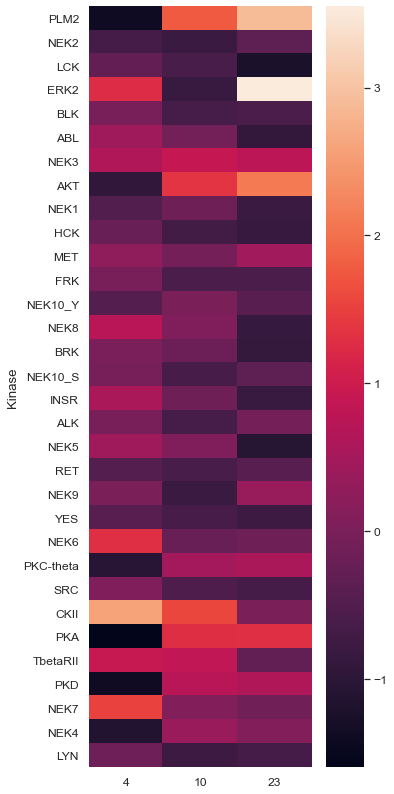

In [15]:
ukin = model.predict_UpstreamKinases()
ukin_mc = MeanCenter(ukin, mc_col=True, mc_row=True)

_, ax = plt.subplots(1, 1, figsize=(5, 14))
ukin_mc.columns = ["Kinase"] + list(np.arange(1, model.ncl+1))
sns.heatmap(ukin_mc.set_index("Kinase")[[4, 10, 23]])